In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import geopandas as geopd
import pandas as pd

import requests as req
import seaborn as sns

import openlocationcode.openlocationcode as olc

BASE = "https://apitransporte.buenosaires.gob.ar"
creds = {
    "client_id": "a7d61f007fbf49698f53d45baa549f82",
    "client_secret": "a6916E0D16A94c1D8CdF81D6C4De8713"
}
comunas = geopd.read_file('comunas.geojson')

In [2]:
resp = req.get(f'{BASE}/datos/movilidad/transito', params=creds)
conteos = pd.read_json(resp.content).drop(columns=['latitud', 'longitud'])
conteos

,location_code,hora,cantidad,sentido
0,48Q3CH00+,2022-10-24T18:00:00-0300,833,Egreso
1,48Q3CH00+,2022-10-24T18:00:00-0300,1565,Interna
2,48Q39J00+,2022-10-24T18:00:00-0300,909,Interna
3,48Q3CJ00+,2022-10-24T18:00:00-0300,4031,Egreso
4,48Q39H00+,2022-10-24T18:00:00-0300,4104,Interna
...,...,...,...,...
8029,48Q39G00+,2022-09-20T00:00:00-0300,1462,Egreso
8030,48Q39H00+,2022-09-20T00:00:00-0300,860,Interna
8031,48Q3CJ00+,2022-09-20T00:00:00-0300,522,Ingreso
8032,48Q3CJ00+,2022-09-20T00:00:00-0300,253,Interna


/tmp/ipykernel_10786/291679910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interna_dia['frac'] = interna_dia['cantidad'] / interna_dia['cantidad'].max()


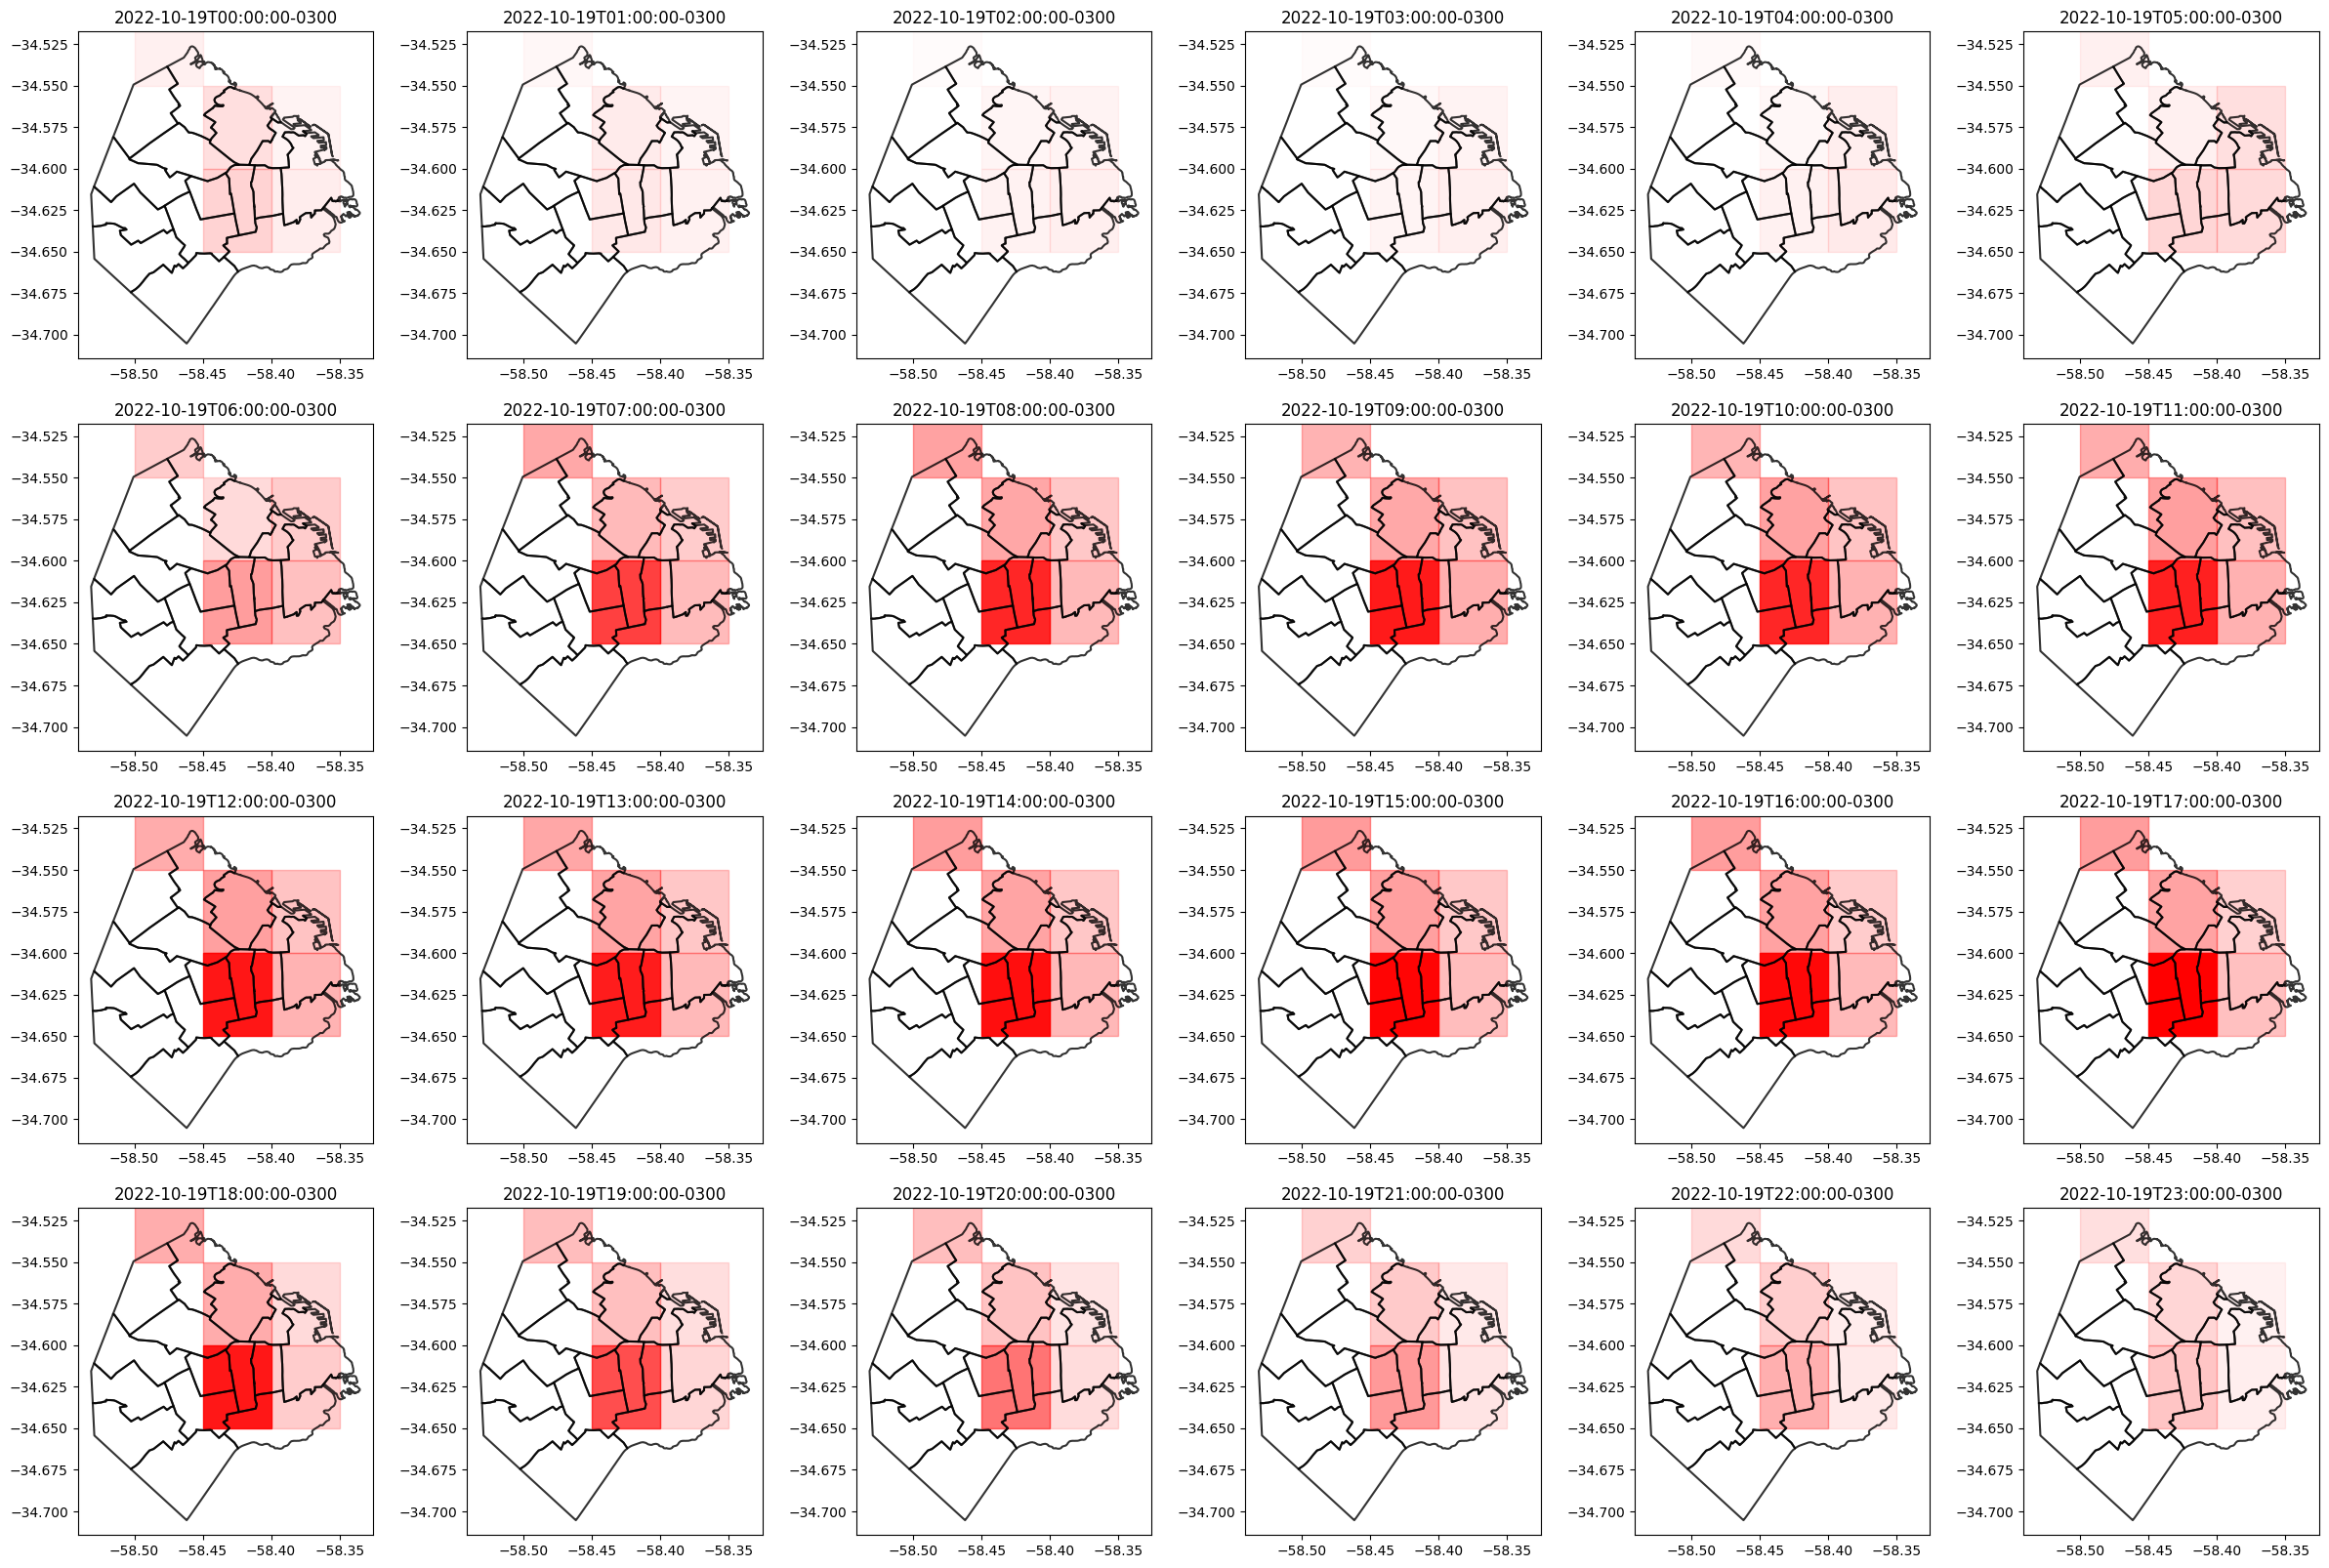

In [3]:
_, axes = plt.subplots(nrows=4, ncols=6, figsize=(30,20))

dia = "2022-10-19"
horas_dia = [f"{dia}T{i:0>2}:00:00-0300" for i in range(24)]
conteos_dia = conteos[conteos['hora'].isin(horas_dia)]
interna_dia = conteos_dia[conteos_dia['sentido'] == 'Interna']
interna_dia['frac'] = interna_dia['cantidad'] / interna_dia['cantidad'].max()

for i, hora in enumerate(horas_dia):
    ax = axes[i // 6][i % 6]
    ax.set_title(hora)
    comunas.boundary.plot(ax=ax, color="black", alpha=0.8)

    interna_hora = interna_dia[interna_dia['hora'] == hora].set_index('location_code')

    for loc_code in interna_hora.index:
        zona = olc.decode(loc_code)
        frac = interna_hora.loc[loc_code]['frac']

        bot = zona.latitudeLo
        left = zona.longitudeLo
        w = zona.longitudeHi - zona.longitudeLo
        h = zona.latitudeHi - zona.latitudeLo

        # Create a Rectangle patch
        rect = patches.Rectangle((left, bot), w, h, linewidth=1, edgecolor='r', facecolor='r', alpha=frac)

        # Add the patch to the Axes
        ax.add_patch(rect)